In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from datetime import datetime
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates

In [76]:
airline_data = pd.read_csv('airline0.csv')

In [77]:
airline_data.head()

,Day,Date,Number,Price
0,0,2021-01-01,4.9373,69.66
1,1,2021-01-02,4.6730,69.44
2,2,2021-01-03,2.1773,67.33
3,3,2021-01-04,3.9448,68.82
4,4,2021-01-05,4.5440,69.33


In [78]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1095 non-null   int64  
 1   Date    1095 non-null   object 
 2   Number  1095 non-null   float64
 3   Price   1095 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 34.3+ KB


In [79]:
# Convert the 'Date' column to datetime
airline_data['Date'] = pd.to_datetime(airline_data['Date'])

# Extract the month and year from the 'Date' column
airline_data['Month'] = airline_data['Date'].dt.month
airline_data['Year'] = airline_data['Date'].dt.year

In [80]:
# Assume the passenger numbers ('Number' column) are daily variations
daily_passenger_numbers = airline_data['Number'].values

In [81]:
# Fourier Transform
fft_values = np.fft.fft(daily_passenger_numbers)
frequencies = np.fft.fftfreq(len(daily_passenger_numbers))

In [82]:
# (C) Derive distribution of average daily number of passengers by month
avg_daily_passenger_per_month = airline_data.groupby('Month')['Number'].mean()

<ipython-input-87-73b24d472b15>:41: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / np.abs(frequencies)


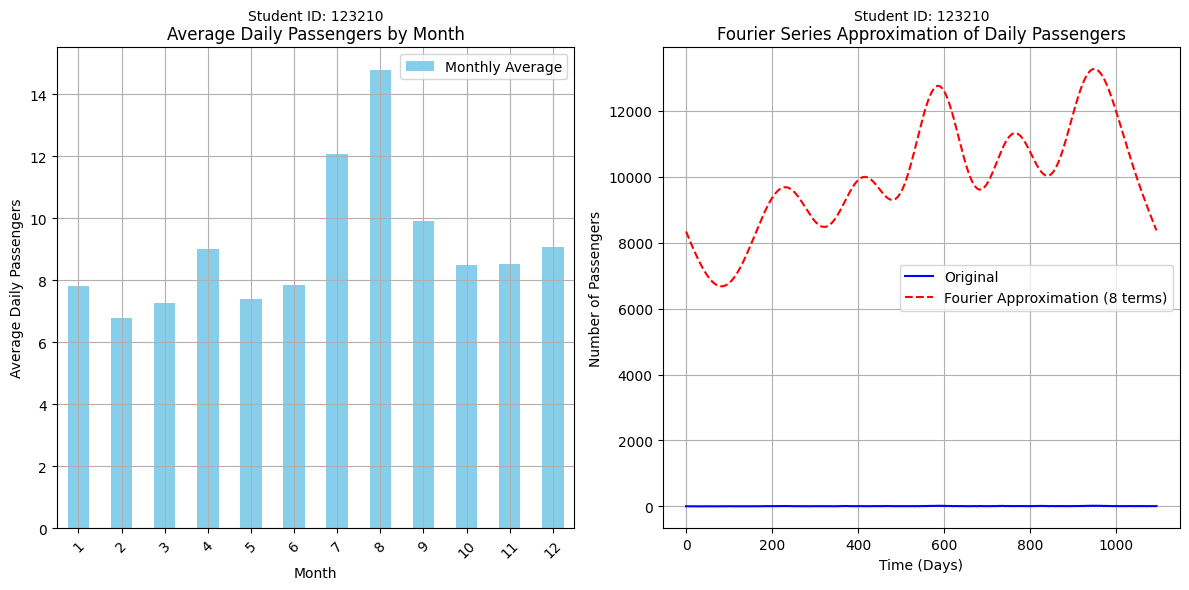

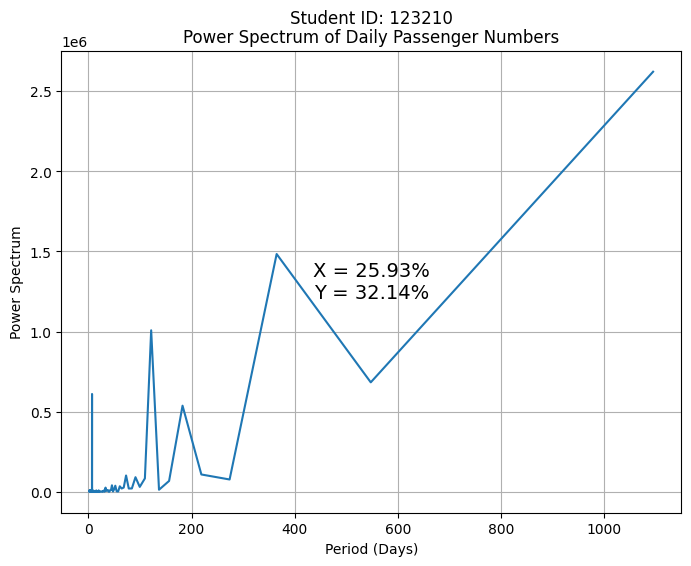

In [87]:
# (D) Plot the average daily passengers per month and Fourier series approximation
plt.figure(figsize=(12, 6))

# Plot average daily passengers per month
plt.subplot(1, 2, 1)
avg_daily_passenger_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Daily Passengers')
plt.title('Average Daily Passengers by Month')
plt.xticks(rotation=45)
plt.legend(['Monthly Average'])
plt.grid(True)

# Add student ID to the plot
plt.text(0.5, 1.05, 'Student ID: 123210', ha='center', va='bottom', fontsize=10, transform=plt.gca().transAxes)

# Plot Fourier series approximation with first 8 terms
plt.subplot(1, 2, 2)
time_points = np.arange(len(daily_passenger_numbers))
approximation = np.zeros_like(daily_passenger_numbers)

# Sum the first 8 terms of the Fourier series
for k in range(8):
    approximation += np.real(fft_values[k]) * np.cos(2 * np.pi * frequencies[k] * time_points) - np.imag(fft_values[k]) * np.sin(2 * np.pi * frequencies[k] * time_points)

plt.plot(time_points, daily_passenger_numbers, label="Original", color='blue')
plt.plot(time_points, approximation, label="Fourier Approximation (8 terms)", color='red', linestyle='--')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Passengers')
plt.title('Fourier Series Approximation of Daily Passengers')
plt.legend()
plt.grid(True)

# Add student ID to the plot
plt.text(0.5, 1.05, 'Student ID: 123210', ha='center', va='bottom', fontsize=10, transform=plt.gca().transAxes)


plt.tight_layout()
# (E) Calculate the power spectrum and plot it
power_spectrum = np.abs(fft_values)**2
periods = 1 / np.abs(frequencies)

# Plot the power spectrum
plt.figure(figsize=(8, 6))
plt.plot(periods[1:len(power_spectrum)//2], power_spectrum[1:len(power_spectrum)//2])  # Ignore the zero-frequency component
plt.xlabel('Period (Days)')
plt.ylabel('Power Spectrum')
plt.title('Power Spectrum of Daily Passenger Numbers')
plt.grid(True)

# Add student ID to the plot
plt.text(0.5, 1.07, 'Student ID: 123210', horizontalalignment='center', verticalalignment='center', fontsize=12, transform=plt.gca().transAxes)


# Calculate X and Y (Revenue and passengers during summer months)
# Summer months: June (6), July (7), and August (8)

# Filter summer months (June, July, August)
summer_months_data = airline_data[airline_data['Month'].isin([6, 7, 8])]

# Calculate the total number of passengers during summer months
total_summer_passengers = summer_months_data['Number'].sum()

# Calculate total number of passengers
total_passengers = airline_data['Number'].sum()

# Calculate the fraction (percentage) of passengers flying during summer months (Y)
Y = (total_summer_passengers / total_passengers) * 100

# Assuming the 'Price' column represents ticket prices, calculate total revenue
summer_revenue = summer_months_data['Price'].sum()
total_revenue = airline_data['Price'].sum()

# Calculate the fraction (percentage) of the revenue from summer months (X)
X = (summer_revenue / total_revenue) * 100

# Print values X and Y on the plot
plt.text(0.5, 0.5, f"X = {X:.2f}%\nY = {Y:.2f}%", horizontalalignment='center', verticalalignment='center', fontsize=14, transform=plt.gca().transAxes)

# Show all plots
plt.show()